# 1


So for this I found part I just found some clean data from Kaggle with facotrs that influence house prices in the US. Its from this link (https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us). I will use this data to test the hypothesis that changes in mortgage interest rates influence home prices.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
supply = pd.read_csv("supply.csv")
demand = pd.read_csv("demand.csv")

df = supply.merge(demand,on=['DATE'])
df = df.drop('CSUSHPISA_y', axis=1) #drop this since it is the same exact column as CSUSHPISA_x

df.dropna(axis=0, inplace=True) #drop any rows with NA values 

#The supply part of the data is not numerical so we need to convert it first as well as declaring the date as a date variable
df['DATE'] = pd.to_datetime(df['DATE'])
df['CSUSHPISA_x'] = df['CSUSHPISA_x'].astype(float)
df['MSACSR']=df['MSACSR'].astype(float)
df['PERMIT']=df['PERMIT'].astype(float)
df['TLRESCONS']=df['TLRESCONS'].astype(float)
df['EVACANTUSQ176N']=df['EVACANTUSQ176N'].astype(float)

#rename the columns 
df.rename(columns={'CSUSHPISA_x':'Home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit','TLRESCONS':'Total_consumption spending'\
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment','INTDSRUSM193N':'Interest_rates'\
                  ,'MSPUS':'Median_sales_price','DATE':'Date'}, inplace = True)
df

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321000,4.200000,1806.333333,421328.6667,14908.0,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756000,3.833333,1837.666667,429308.6667,15244.0,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013000,3.633333,1937.333333,458890.0000,15614.0,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.835667,3.966667,1972.333333,491437.3333,15654.0,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.298667,3.700000,1994.666667,506856.3333,15895.0,5.597500,98.000000,2.000000,212700,11923.447
...,...,...,...,...,...,...,...,...,...,...,...
69,2020-01-04,217.239000,5.300000,1210.666667,603744.6667,13876.0,3.239231,74.066667,0.250000,322600,19636.731
70,2020-01-07,222.641333,3.400000,1577.666667,646601.6667,14249.0,2.952308,75.666667,0.250000,337500,21362.428
71,2020-01-10,233.090000,3.866667,1698.333333,707944.3333,15446.0,2.760714,79.800000,0.250000,358700,21704.706
72,2021-01-01,242.267000,4.333333,1765.666667,753515.6667,15602.0,2.875833,80.233333,0.250000,369800,22313.850


Summary Statistics

In [77]:
summary_stats = df.describe()
summary_stats

,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,171.819396,6.012162,1277.968468,458671.117114,17287.635135,4.695124,83.904505,1.961712,265783.783784,16553.530014
std,28.017115,1.897556,484.194145,142075.505239,1291.164289,1.077909,11.349075,1.732885,47789.455555,3108.424221
min,129.321000,3.400000,538.666667,246953.333300,13876.000000,2.760714,57.666667,0.250000,186000.000000,11174.129000
25%,148.025250,4.800000,960.416667,330418.999975,16143.250000,3.852692,75.541667,0.750000,226600.000000,14409.286750
50%,169.269000,5.500000,1254.833333,473091.166650,17381.500000,4.438077,85.650000,1.041667,248250.000000,16137.977000
75%,184.665750,6.875000,1600.250000,561016.666675,18437.000000,5.767308,93.683333,2.562500,309675.000000,18919.895500
max,253.814000,11.400000,2228.333333,795501.333300,19137.000000,6.602308,98.933333,6.250000,382600.000000,23046.934000


Stylized Facts

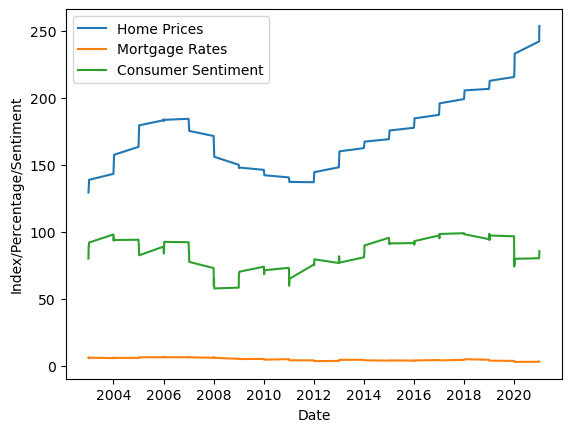

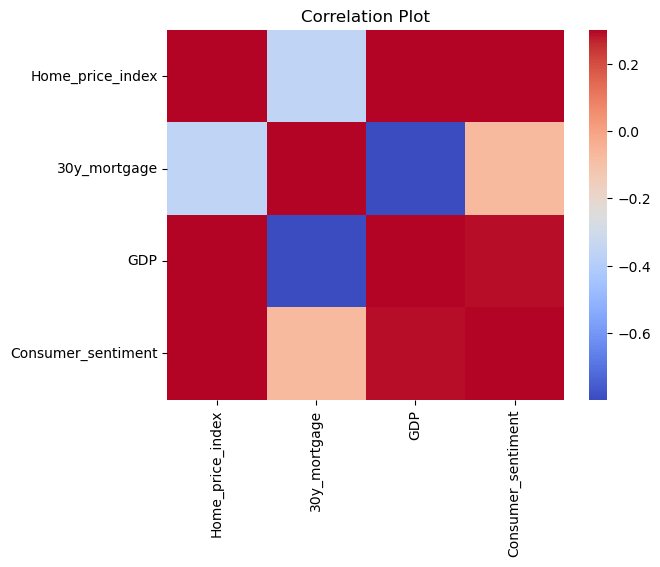

In [78]:
# Assuming 'data' contains the relevant columns for analysis

# Plotting time series of home prices and mortgage interest rates
plt.plot(df['Date'], df['Home_price_index'], label='Home Prices')
plt.plot(df['Date'], df['30y_mortgage'], label='Mortgage Rates')
plt.plot(df['Date'], df['Consumer_sentiment'], label='Consumer Sentiment')
plt.xlabel('Date')
plt.ylabel('Index/Percentage/Sentiment')
plt.legend()
plt.show()

# Computing correlations between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Home_price_index', '30y_mortgage', 'GDP', 'Consumer_sentiment']].corr()

#Hide the upper tirangle of the correlation matrix by masking it out
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a correlation plot using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm',vmax=.3, annot=False)

# Set the title of the plot
plt.title('Correlation Plot')

# Show the plot
plt.show()


Econometric model (Multiple Regression)

In [79]:
import statsmodels.api as sm

# Define dependent and independent variables
y = df['Home_price_index']  # Dependent variable: Home Prices
X = df[['30y_mortgage', 'GDP','Consumer_sentiment']]  # Independent variables: Mortgage Rates and then the rest of the data as controls.

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Home_price_index   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     82.44
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           6.36e-23
Time:                        16:19:10   Log-Likelihood:                -295.21
No. Observations:                  74   AIC:                             598.4
Df Residuals:                      70   BIC:                             607.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -118.1175     24

Robustness Checks

In [83]:
# Lets first add in some more controls of the rest of the varibales in the dataset and re run the regression
# Define dependent and independent variables
y2 = df['Home_price_index']  # Dependent variable: Home Prices
X2 = df[['30y_mortgage','GDP','Consumer_sentiment','Monthly_supply', 'Permit','Total_consumption spending'\
                  ,'Housing_inventory','Interest_rates','Median_sales_price']]  # Independent variables: Mortgage Rates and then the rest of the data as controls.
# Add constant term to the independent variables
X2 = sm.add_constant(X2)

# Fit the multiple regression model
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

# Print the model summary
print(results2.summary())


# We could also add a lagged dependent variable (Home Price Index) as a control variable:

# Convert the desired columns to a DataFrame
X3 = pd.DataFrame({'30y_mortgage': df['30y_mortgage'], 'GDP': df['GDP'], 'Consumer_sentiment': df['Consumer_sentiment'], 'Home_price_index_lagged': df['Home_price_index'].shift(1)})

# Drop the missing values resulting from the lag operation
X3 = X3.dropna()

# Fit the multiple regression model with the modified X
model3 = sm.OLS(y2[X3.index], sm.add_constant(X3))
results3 = model.fit()
print(results3.summary())



                            OLS Regression Results                            
Dep. Variable:       Home_price_index   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     523.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.24e-56
Time:                        16:21:22   Log-Likelihood:                -191.56
No. Observations:                  74   AIC:                             403.1
Df Residuals:                      64   BIC:                             426.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Some more visualization of output

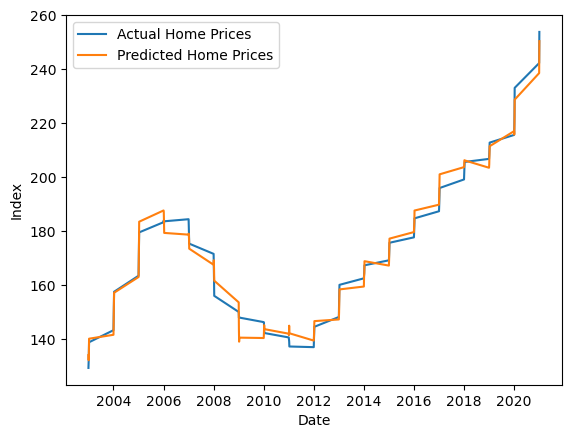

In [85]:
# Visualize the model's predictions from result2 using all of the covariates
predicted_values = results2.predict(X2)
plt.plot(df['Date'], y2, label='Actual Home Prices')
plt.plot(df['Date'], predicted_values, label='Predicted Home Prices')
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend()
plt.show()

# 2


In [90]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [91]:
driver = webdriver.Chrome(executable_path = 'Users/econgrad/Documents/Econ_294A_py/Final/chromedriver_mac_arm64')

C:\Users\econgrad\AppData\Local\Temp\ipykernel_2268\168973830.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = 'Users/econgrad/Documents/Econ_294A_py/Final/chromedriver_mac_arm64')


In [92]:
driver.get('https://newsroom.fmglobal.com/releases')

In [93]:
Articles = {}
from selenium.webdriver.common.by import By

for i in range(1, 6):
    try:
        driver.find_element(By.XPATH, '/html/body/main/div/div[2]/div[1]/article[' + str(i) + ']/div/h5/a').click()
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        article = soup.find('article', class_='article').text
        Articles[i] = article
        driver.find_element(By.XPATH, '/html/body/main/div/div[1]/div[2]/div/ul/li[3]/a').click()
    except: 
        e = 0
        Articles[i] = e
        print('Some error happened at', driver.find_element(By.XPATH,'/html/body/main/div/div[2]/div[1]/article[' + str(i) + ']/div/h5/a').text)


In [94]:
Articles

{1: '\n\n\nJune 13, 2023\n\n\nNew 2023 FM Global Resilience Index fuels business continuity and sustainable growth \n\n\nDefinitive ranking of countries’ business environments helps companies select new sites, create stronger supply chains, and target new markets\n\n\n\nJOHNSTON, R.I., USA, June\xa013, 2023 – Commercial property insurer FM Global today revealed the 2023 FM Global Resilience Index, an online, interactive tool that supports strategic decision-making for global businesses. The index ranks countries on 15 measures of economic, risk quality and supply chain resilience.\nThe FM Global Resilience Index is considered an essential tool for site selection, supply chain design and market targeting amid critical business risks like climate change, economic volatility and geopolitical tensions. Several global organizations have found the data-rich index so valuable they have integrated it into their site-selection/enterprise risk management software for strategic decision-making, d

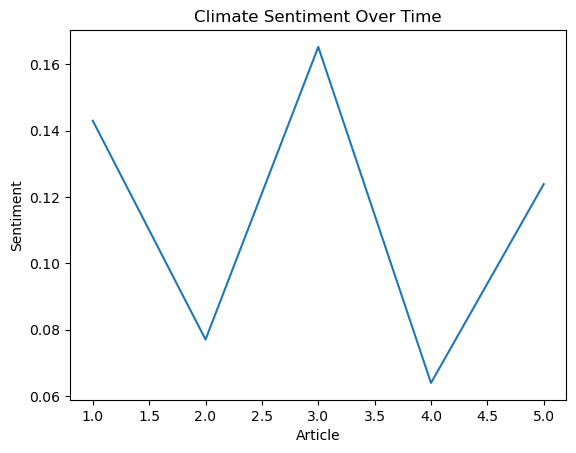

In [95]:
#Sentiment analysis
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

sentiment_scores = []

# Perform sentiment analysis on each article by iterating through each news article stored in the Articles dictionary
for key, article in Articles.items():
    blob = TextBlob(article)
    polarity = blob.sentiment.polarity #calculate the polarity score
    sentiment_scores.append((key, polarity))

# Convert sentiment scores to a DataFrame
df_sentiment = pd.DataFrame(sentiment_scores, columns=['Article', 'Sentiment'])

# Plot the sentiment scores over time
plt.plot(df_sentiment['Article'], df_sentiment['Sentiment'])
plt.xlabel('Article')
plt.ylabel('Sentiment')
plt.title('Climate Sentiment Over Time')
plt.show()



In [114]:
from nltk import bigrams, trigrams, word_tokenize
from nltk.corpus import stopwords
import numpy as np

def calculate_similarity(articles):
    similarity_scores = {}

    # Step 1: Tokenize the articles into words and generate bigrams and trigrams
    for key, article in articles.items():
        words = word_tokenize(article)
        words = [word.lower() for word in words]  # Convert words to lowercase
        words = [word for word in words if word.isalpha()]  # Remove non-alphabetic words
        words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords

        article_bigrams = list(bigrams(words))
        article_trigrams = list(trigrams(words))

        # Step 2: Calculate the frequency distributions of bigrams and trigrams
        bigram_freq_dist = np.unique(article_bigrams, return_counts=True, axis=0)
        trigram_freq_dist = np.unique(article_trigrams, return_counts=True, axis=0)

        # Step 3: Retrieve the most common bigrams and trigrams for the article
        most_common_bigrams = bigram_freq_dist[0][np.argsort(bigram_freq_dist[1])][::-1][:10]
        most_common_trigrams = trigram_freq_dist[0][np.argsort(trigram_freq_dist[1])][::-1][:10]

        # Step 4: Calculate the similarity score based on the frequencies of most common bigrams and trigrams
        numerator = 0
        for bigram in most_common_bigrams:
            count = bigram_freq_dist[1][np.where(np.all(bigram_freq_dist[0] == bigram, axis=1))]
            if len(count) > 0:
                numerator += count[0]

        for trigram in most_common_trigrams:
            count = trigram_freq_dist[1][np.where(np.all(trigram_freq_dist[0] == trigram, axis=1))]
            if len(count) > 0:
                numerator += count[0]

        denominator = len(article_bigrams) + len(article_trigrams)
        similarity_score = numerator / denominator

        # Store the similarity score in the dictionary
        similarity_scores[key] = similarity_score

        # Print the most common bigrams and trigrams
        print("Article", key, "- Most Common Bigrams:")
        for i, bigram in enumerate(most_common_bigrams):
            words = ' '.join(bigram)
            count = bigram_freq_dist[1][np.where(np.all(bigram_freq_dist[0] == bigram, axis=1))]
            if len(count) > 0:
                print(words, "-", count[0])

        print("Article", key, "- Most Common Trigrams:")
        for i, trigram in enumerate(most_common_trigrams):
            words = ' '.join(trigram)
            count = trigram_freq_dist[1][np.where(np.all(trigram_freq_dist[0] == trigram, axis=1))]
            if len(count) > 0:
                print(words, "-", count[0])

        print()  # Print an empty line for separation

    return similarity_scores

# Calculate the similarity scores for the articles
similarity_scores = calculate_similarity(Articles)

# Print the similarity scores
for key, score in similarity_scores.items():
    print("Article", key, "- Similarity Score:", score)


Article 1 - Most Common Bigrams:
fm global - 13
resilience index - 10
global resilience - 5
risk management - 4
climate risk - 3
climate change - 3
risk quality - 3
supply chain - 3
business continuity - 3
help companies - 2
Article 1 - Most Common Trigrams:
global resilience index - 5
fm global resilience - 5
united states region - 2
climate risk quality - 2
decisions fm global - 2
fm global potential - 1
facts support good - 1
faller lebanon dropped - 1
finland austria bottom - 1
fm global better - 1

Article 2 - Most Common Bigrams:
climate change - 9
fm global - 9
change impact - 5
impact report - 4
risk management - 3
climate resilience - 2
sea levels - 2
rising sea - 2
management resilience - 2
help clients - 2
Article 2 - Most Common Trigrams:
climate change impact - 5
change impact report - 4
risk management resilience - 2
rising sea levels - 2
world largest organizations - 1
fm global established - 1
factor decisions made - 1
far future response - 1
financial disclosures kind 

# 3

In [22]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tickers
tickers = ["ESGV", "ESG.TO", "EBLU", "RESP"]

# Define the start and end dates for the historical data
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')

# Create a dictionary to store the historical data for each ticker
historical_data = {}

# Retrieve the historical data for each ticker
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    historical_data[ticker] = data

# Calculate the daily returns for each ticker
returns = pd.DataFrame()
for ticker, data in historical_data.items():
    data['Return'] = data['Close'].pct_change()
    returns[ticker] = data['Return']

# Calculate the correlation matrix
correlation_matrix = returns.corr().round(3)

# Print the correlation matrix
correlation_matrix


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ESGV,ESG.TO,EBLU,RESP
ESGV,1.000,0.750,0.867,0.979
ESG.TO,0.750,1.000,0.645,0.749
EBLU,0.867,0.645,1.000,0.878
RESP,0.979,0.749,0.878,1.000


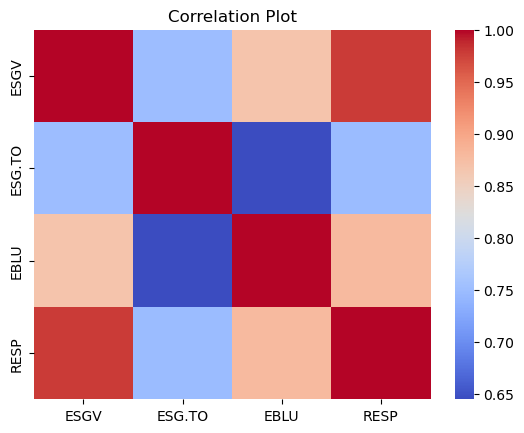

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#Hide the upper tirangle of the correlation matrix by masking it out
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a correlation plot using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# Set the title of the plot
plt.title('Correlation Plot')

# Show the plot
plt.show()

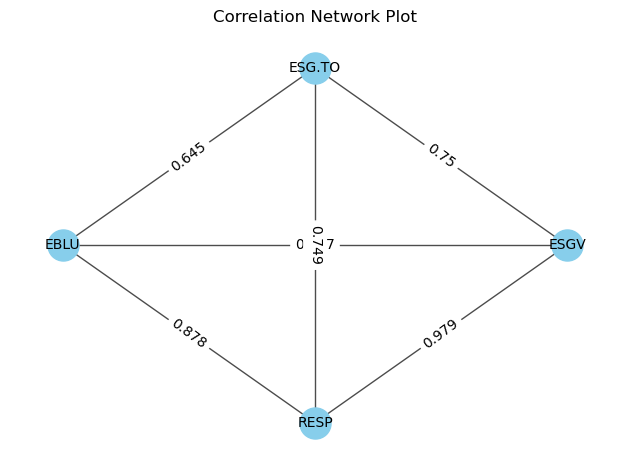

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network plot
G = nx.Graph()

# Add nodes (tickers) to the graph
G.add_nodes_from(tickers)

# Add edges (correlations) to the graph
for i, ticker1 in enumerate(tickers):
    for j, ticker2 in enumerate(tickers):
        if i < j:
            correlation = correlation_matrix.loc[ticker1, ticker2]
            G.add_edge(ticker1, ticker2, weight=correlation)

# Set positions for nodes in the graph
pos = nx.circular_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7)

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels (correlation values)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot title
plt.title('Correlation Network Plot')

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the S&P 500 ticker
sp500_ticker = "^GSPC"

# Retrieve the historical data for S&P 500
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)

# Calculate the daily returns for S&P 500
sp500_data['S&P 500 Return'] = sp500_data['Close'].pct_change()

# Merge the ETF returns and S&P 500 returns into a single DataFrame
returns = pd.concat([returns, sp500_data['S&P 500 Return']], axis=1)

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Print the correlation matrix
correlation_matrix


[*********************100%***********************]  1 of 1 completed


,ESGV,ESG.TO,EBLU,RESP,S&P 500 Return
ESGV,1.000000,0.750336,0.866697,0.978559,0.992741
ESG.TO,0.750336,1.000000,0.645364,0.749081,0.737709
EBLU,0.866697,0.645364,1.000000,0.878428,0.870755
RESP,0.978559,0.749081,0.878428,1.000000,0.984281
S&P 500 Return,0.992741,0.737709,0.870755,0.984281,1.000000


The wording was a bit unclear on this question so I also aggregated the ETF returns and looked at that correlation with the Index. 

In [26]:
# Combine the returns of all ETFs into a single column
returns['Combined ETFs'] = returns.mean(axis=1)

# Merge the returns of the combined ETFs and S&P 500 into a single DataFrame
combined_returns = pd.concat([returns['Combined ETFs'], sp500_data['S&P 500 Return']], axis=1)

# Calculate the correlation between the combined ETF returns and S&P 500 returns
correlation = combined_returns.corr().iloc[0, 1]

# Print the correlation
print(f"Correlation between Combined ETFs and S&P 500: {correlation}")

Correlation between Combined ETFs and S&P 500: 0.9825493430021683
